# Example: COVID19 pandemic

Author: Begoña Ispizua (ispizuabego@gmail.com)

Part of the Final Degree Project at the University of the Basque Country (UPV/EHU). September 2020.

In [1]:

import src.rmf_tool as rmf


import importlib
importlib.reload(rmf)

# to numerically integrate the ODE
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

%matplotlib notebook

Suppose that we want to simulate a model composed of  𝑁  agents where each agent has 4 possible states : infected, susceptible, immune and confined. If we denote by  $x_0, x_1, x_2$ and $x_3$ the transitions for this model are:

<ul>
<li>$𝑥 \longrightarrow 𝑥+\frac{1}{N}(𝑒_2−𝑒_0)$  at rate  $3.5 N x_0$</li>
    
<li>$𝑥 \longrightarrow 𝑥+\frac{1}{N}(𝑒_3−𝑒_0)$  at rate  $6.5N x_0$</li>
    
<li>$𝑥 \longrightarrow 𝑥+\frac{1}{N}(𝑒_3−𝑒_1)$  at rate  $0.5 N x_1$</li>
    
<li>$𝑥 \longrightarrow 𝑥+\frac{1}{N}(𝑒_0−𝑒_1)$  at rate  $14 N x_0 x_1$</li>
    
<li>$𝑥 \longrightarrow 𝑥+\frac{1}{N}(𝑒_1−𝑒_2)$  at rate  $0.3 N x_2$</li>
    
<li>$𝑥 \longrightarrow 𝑥+\frac{1}{N}(𝑒_2−𝑒_3)$  at rate  $2.7 N x_3$</li>
</ul>
     


In [2]:
ddpp = rmf.DDPP()

In [3]:

ddpp.add_transition([-1,0,0,1],lambda x:x[0]*6.08) 
ddpp.add_transition([-1,0,1,0],lambda x:x[0]*8.85) 
ddpp.add_transition([0,-1,0,1],lambda x:x[1]*2.00) #susceptibles a confinados
ddpp.add_transition([1,-1,0,0],lambda x:x[0]*x[1]*60.82) #susceptibles a infectados
ddpp.add_transition([0,1,-1,0],lambda x:x[2]*2.00) #inmunes a susceptibles
ddpp.add_transition([0,0,1,-1],lambda x:x[3]*5.89) #confinados a inmune


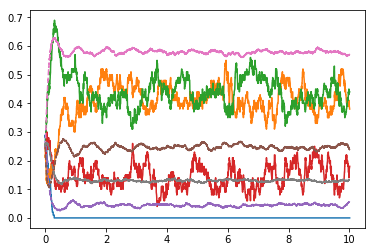

In [4]:
ddpp.set_initial_state([.25,.25,.25,.25]) 

#ddpp.set_initial_state([.25,.25,.25,.25])

T,X = ddpp.simulate(100,time=10) # We first plot a trajectory for $N=100$
plt.plot(T,X)
T,X = ddpp.simulate(10000,time=10) # Then for $N=1000$
plt.plot(T,X,'--')

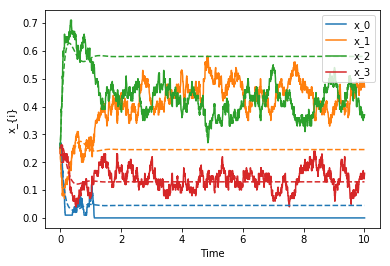

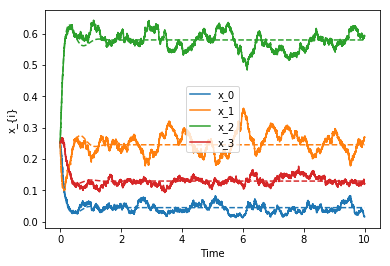

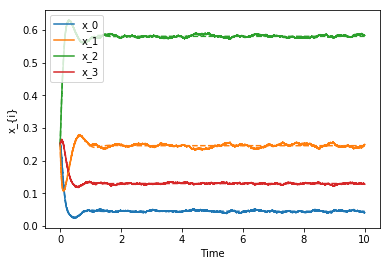

In [5]:
plt.figure()
ddpp.plot_ODE_vs_simulation(N=100)
plt.figure()
ddpp.plot_ODE_vs_simulation(N=1000)
plt.figure()
ddpp.plot_ODE_vs_simulation(N=30000)

In [6]:
%time pi,K,W = ddpp.meanFieldExpansionSteadyState(order=1)
print(pi,K)

CPU times: user 57 ms, sys: 533 µs, total: 57.5 ms
Wall time: 366 ms
[0.04482228 0.24547846 0.58007678 0.12962248] [-1.34913413  5.47670623 -4.59458007  0.46700797]


In [7]:
 
for N in [20,40,60]:
    Xm,Xrmf,Xs,Ks = ddpp.compare_refinedMF(N,time=1000)
    print('N = ',N)
    print(Xm, 'mean-field')
    print(Xrmf,'Refined mean-field')
    print(Xs, 'Simulation')
    #print(abs(Xs-Xrmf)-1/N)
    print(' ')
    print(abs(Xs-Xrmf),'Diference refined mean-field and simulation')
    print(abs(Xs-Xm),'Diference mean-field and simulation')
    print('')

N =  20
[0.04482228 0.24547846 0.58007678 0.12962248] mean-field
[-0.02263443  0.51931377  0.35034778  0.15297287] Refined mean-field
[1.38082470e-17 4.32620447e-01 4.15999684e-01 1.46368926e-01] Simulation
 
[0.02263443 0.08669333 0.06565191 0.00660395] Diference refined mean-field and simulation
[0.04482228 0.18714199 0.1640771  0.01674645] Diference mean-field and simulation

N =  40
[0.04482228 0.24547846 0.58007678 0.12962248] mean-field
[0.01109393 0.38239612 0.46521228 0.14129768] Refined mean-field
[3.45882863e-17 4.25830230e-01 4.24357105e-01 1.46752143e-01] Simulation
 
[0.01109393 0.04343411 0.04085518 0.00545447] Diference refined mean-field and simulation
[0.04482228 0.18035177 0.15571968 0.01712967] Diference mean-field and simulation

N =  60
[0.04482228 0.24547846 0.58007678 0.12962248] mean-field
[0.02233671 0.3367569  0.50350045 0.13740594] Refined mean-field
[4.84895658e-17 4.24616849e-01 4.26882177e-01 1.46798530e-01] Simulation
 
[0.02233671 0.08785995 0.07661827 0